In [1]:
# Import the libraries and dependencies:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# OVERSAMPLING
# As mentioned earlier, the term IMBALANCED CLASSES means that the existing classes in a dataset aren't equally represented.
# We discussed a fraud detection scenario as an example,.
# In this case, a large number of credit card transactions are legitimate, and only a small number are fraud.
# Say that out of 100,000 transactions, 50 are fraud, and the rest are legitimate.
# The pronounced imbalance between the classes can cause machine learning models to have a bias toward the larger class.
# The model will then excel at predicting the transactions that aren't fraud compared to those that are fraud.
# This is a problem if the goal is to detect fraudulent transactions.
# In such a case, even a model that blindly classifies every transaction an not fraud will achieve great accuracy.
# As we learned earlier, one strategy to deal with imbalanced classes is to use the appropriate metrics to evaluate the model's performance, such as precision and recall.

# REWIND
# The precision calculates the number of false positives that the model produced relative to the total number of instances.
# The recall calculates the ratio of the known values from the testing dataset to the values that the model failed to predict.

# Another strategy is to use OVERSAMPLING. 
# The idea is this: If one class doesn't have enough instances in the training se, we'll choose more instances from that class to do the training.
# In fact, we'll resample enough of the original instances to make the size of the smaller class equal to the size of the larger class in the training set.

In [13]:
# RANDOM OVERSAMPLING
# In RANDOM OVERSAMPLING, we randomly select instances of the minority class and add them to the training set until we've balanced the majority and minority classes.

# NOTE:
# In the machine learning field, people often refer to the larger class as the MAJORITY class and to the smaller class as the MINORITY class.

# Consider an example dataset.
# It has usage statistics that include the number of times customers have downloaded a popular mobile payments app.
# The total number of downloads is 650, but we can divide them as follows:
    # 1. Of these data points, 600 represent customers who downloaded the app but didn't use it for any transaction.
    # 2. An additional 50 data points represent customers who downloaded the app and then used it to make a payment.
# Customer usage statistics commonly present this type of situation - which has imbalanced classes.
# That is, a much smaller number of people actively engage with the product than the full sample of people that have encountered the product.
# To balance the classes via random oversampling, we go through the following steps, which the sections to follow explain how to implement using Python:
    # 1. Read the data.
    # 2. Visualize the data.
    # 3. Split the data into training and testing sets.
    # 4. Count the label ('y') values using the value_counts function.
    # 5. Based on label value count, oversample the data.
    # 6. Fit a logic regression model.
    # 7. Make predictions.
    # 8. Evaluate the model.

In [14]:
# READ THE DATA
# First, we read the features data and hte labels into a DataFrame. 
# The features data contains each user's download data and location.
# The labels data represents whether each user ultimately used the app for a transaction, 1 being yes, and 0 being no.

# NOTE
# Keep in mind that instead of using `features` and `labels` for the variable names, we'll use X for features and y for the class label.
# Machine learning code commonly does this.
# Remember: X is uppercase because the features data usually has multiple columns.
# By contrast, 1 is lowercase because we rarely predict more than one column at a time.

app_df = pd.read_csv(
    Path('app_stats.csv'),
)

display(app_df.head())
display(app_df.tail())

,Download Date,Download Location,y
0,3.368873,6.174326,0
1,-3.091484,0.052052,0
2,2.240576,1.259282,0
3,6.809486,5.390839,0
4,-3.557147,-0.667529,0


,Download Date,Download Location,y
645,-9.353526,2.167014,0
646,-1.855451,3.262719,0
647,0.488071,1.371498,0
648,4.074942,4.157977,0
649,-2.810130,1.951418,0


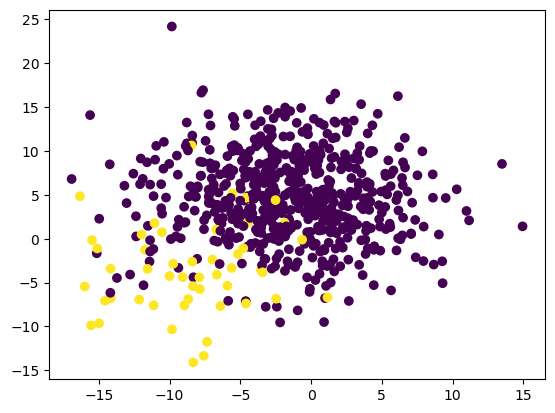

In [15]:
plt.scatter(
    # Put the user download data along the x-axis
    x=app_df['Download Date'],
    # Put the user download location along the y-axis
    y=app_df['Download Location'],
    # Plot the binary y variable as the color
    c=app_df['y']
)

# Show the plot
plt.show()

In [16]:
# BREAKDOWN
# The visualization confirms the class imbalance.
# The purple data points represent the people that downloaded the app but didn't use it.
# The yellow data points represent the people that downloaded the app then make a transaction.
# The purple data points clearly outnumber that of the yellow, which means more people downloaded the app, but didn't use it.
# Furthermore, the two classes don't appear to be as distinct as in some of the earlier examples.
# That is, the colors somewhat overlap at their margins.
# Based on our features, this means that some of these customers seem like they could be classified either way.
# In addition to our imbalanced classes, this ambiguity presents challenges for our model.

In [17]:
# SPLIT THE DATA INTO TRAINING AND TESTING SETS
# Before we begin fitting the model, we split the data into training and testing sets:

# Import the module:
from sklearn.model_selection import train_test_split

# Separate the label, or y from the features:
y = app_df['y']

# Drop the y column to separate the features:
X = app_df.drop(columns='y')

# Split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Next, we can check the class imbalance by counting the classes that appear in our training data.
# To do this, we can use the `value_counts` function:

# Count the distinct values:
y_train.value_counts()

0    448
1     39
Name: y, dtype: int64

In [19]:
# BREAKDOWN
# We find that the majority class label has 448 instances, whereas the minority one has only 39.
# However, we want an equal representation of both classes in the training data.
# To achieve this, we can use a model that's capable of oversampling the underrepresented class.
# This creates a set of training data by choosing values from both classes.
# However, with oversampling, it chooses the underrepresented class multiple times to increase the number of times that the model gets it during training.

In [20]:
# OVERSAMPLING THE DATA
# To oversample the data, we use a new library named imbalanced-learn, or imblearn.
# This library of tools can help us fix imbalanced classes.
# It has several models and custom evaluation metrics to make it easier to create, train, and evaluate models with imbalanced classes.
# For our example, we use the `RandomOverSampler` function to oversample the data:

# Import the Imbalanced Learn RandomOverSampler module:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler instance:
random_oversampler = RandomOverSampler(random_state=1)

# Resample the data:
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

In [22]:
# BREAKDOWN
# Let's break down what's happening:
    # 1. An instance of `RandomOverSampler` is instantiated as `random_oversampler`.
    # 2. The training data (X_train, y_train) is resampled via the `fit_sample` function.
    # 3. The results are named `X_resampled` and `y_resampled`.
# We can now check the value counts of the resampled labels.
# Once the data has been oversampled and both labels have a value of 448, then we can move to choosing and fitting the model.

# Count the distinct values:
y_resampled.value_counts()

0    448
1    448
Name: y, dtype: int64

In [23]:
# FIT A LOGISITIC REGRESSION MODEL
# With our resampled dataset available, we can now carry out the familiar pipeline:
    # 1. Choose the model
    # 2. Fit the model
    # 3. Make predictions
    # 4. Evaluate the model's performance
# Specifically, we'll evaluate how well it predicts the most engaged app users.
# For this example, we'll use a logistic regression model.
# However, its worth pointing out that we could use an alternative machine learning model with this data.

# Import the module:
from sklearn.linear_model import LogisticRegression

# Declare a logistic regression model:
model = LogisticRegression()

# fit the model:
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [25]:
# MAKE PREDICTIONS
# We have the model make predictions, and we then generate a confusion matrix with the results.

# Import the module:
from sklearn.metrics import confusion_matrix

# Predict the labels for the testing features:
y_pred = model.predict(X_test)

# Pring the confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[131  21]
 [  1  10]]


In [28]:
# EVALUATE THE MODEL
# To calculate the accuracy score of the model, we use the `balanced_accuracy_score` module.
# This is similar to the `accuracy_score` module that we used earlier.
# But, `balanced_accuracy_score` does a better job of evaluating imbalanced classes.

# Import the module:
from sklearn.metrics import balanced_accuracy_score

# Print the accuracy score:
print(balanced_accuracy_score(y_test, y_pred))

0.8854665071770335


In [17]:
# BREAKDOWN
# We find that the accuracy score is high at 88%.
# But as we've found before, this number can be misleading, especially in an imbalanced dataset.
# Let's examine the classification report to further assess the results.
# We use the `classification_report_imbalanced` module to do so.
# This is similar to the `classification_report` module we used earlier, except that it has additional metrics for imbalanced classes.

# Import the module:
from imblearn.metrics import classification_report_imbalanced

# Print the imbalanced classification report:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.86      0.91      0.92      0.89      0.78       152
          1       0.32      0.91      0.86      0.48      0.89      0.79        11

avg / total       0.95      0.87      0.91      0.89      0.89      0.78       163



In [18]:
# DEEP DIVE
# You can read more about the additional metrics in the report link at the imblearn documentation page:
    # https://imbalanced-learn.org/dev/references/metrics.html

In [19]:
# BREAKDOWN 
# Let's examine a few numbers in this classification report.
# If you think the of the classification report as a dashboard for this model's performance, the following results will stand out:
    # 1. The precision is very high for the 0 class and very low for the 1 class. We see this with the F1 score as well.
# Here's one way to think about this: For every 100 predictions that the model made that user will make a payment, only 32 did so.
# But the model does better with the less-engaged users.
# That is, for every 100 predictions that a user will download but not use the app, 99 were correct.
    # 2. The recall for the 0 and 1 classes almost match.
        # Remember the definition for this metric: of all the actual 0 and 1 values, how many did the model get right?
        # First, note that the testing dataset had 11 actual values. (We can find that number in the 'sup' column, which stands for 'support').
        # This means that this model is correctly predicted 10 of them (0.91 x 11).
        # By accurately identifying 91% of all the users who actually made a payment via the app, the model did a fairly good job.        

In [25]:
# COMPARE THE RESULTS
# For a final point of examination, let's compare the results from the logistic regression model that used oversampling with the logistic regression model that used only the original imbalanced dataset.

# Import the libraries and dependencies:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Print the value count:
print(y_train.value_counts())

# Fit the training data to the LogisticRegression model using the original dataset:
model.fit(X_train, y_train)

# Generate the training predictions of the original dataset:
training_predictions = model.predict(X_train)

# Generate the testing predictions of the original dataset:
testing_predictions = model.predict(X_test)

# Print the balanced accuracy scores:
print(balanced_accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, testing_predictions))

# Create the confusion_matrices for the original dataset:
training_matrix = confusion_matrix(y_train, training_predictions)
testing_matrix = confusion_matrix(y_test, testing_predictions)

# Display the confusion matrices:
print(testing_matrix)

# Create the classification reports:
training_report = classification_report(y_train, training_predictions)
testing_report = classification_report(y_test, testing_predictions)

# Display the classification reports for the original dataset and for the imbalanced dataset:
print(testing_report)
print(classification_report_imbalanced(y_test, y_pred))

0    448
1     39
Name: y, dtype: int64
0.8854665071770335
0.5843301435406698
[[150   2]
 [  9   2]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       152
           1       0.50      0.18      0.27        11

    accuracy                           0.93       163
   macro avg       0.72      0.58      0.62       163
weighted avg       0.91      0.93      0.92       163

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.86      0.91      0.92      0.89      0.78       152
          1       0.32      0.91      0.86      0.48      0.89      0.79        11

avg / total       0.95      0.87      0.91      0.89      0.89      0.78       163



In [26]:
# Notice that the balanced accuracy score is 58.4% for the original dataset.
# Comparing that to the balanced accuracy score of 88.5% of the oversampled data, we can observe the obvious boost.
# However, this can be misleading.
# Now let's compare how the two models did with the preceison for class 1.
# The model that used the imbalanced data produced a precision 50%.
# The model that used the oversampled data produced a precision of 32%.
# So, the logisitc regression model that used the original imbalanced data did slightly better at making predictions for class 1.
# Finally, let's compare how the two models did with the recall for the 1 class.
# The model that used the imbalanced data produced a recall of 18%.
# While the oversampled data model produced a recall of 91%.
# So, the model that used the oversampled data was dramatically more accurate at predicting who would both download and use the application.

In [ ]:
# CONCLUSION
# Taken together, what does this all mean?
# The answer comes if we think about what oversampling does: It artificially increases the number of instances in the minority class.
# In this case, it increases the frequency of the 1 values.
# That trains the model to tend to correctly predict all the true 1 values (to have a higher recall).
# But, this happens at the expense of tending to overestimate the frequency of the 1 values (to have a lower precision).
# We have this constant tradeoff when dealing with classification problems.
# Whether we should oversample the minority class depends on what matters most in our context.
# If not correctly identifying power users of the app (that is, not correctly classifying a 1 value) costs us the first valuable customers, we might want to oversample the minority class.
# But it it's the other way around - that is, if flaggin too many users as potential revenue generators will cost the company in advertising or customer retention dollars - we might want to avoid oversampling.

# NOTE
# Don't worry about memorizing everything in the classification report.
# Reading a classification report with more ease comes with practice.
# And you'll have plenty of chances to examine classification reports again.